# SC1015 A133 Group 6 - Mini Project

This project is aims to accurately predict whether a patient will have stroke based on some common factors amongs stroke patients. The dataset is from Kaggle. In this notebook, you will find the complete analysis we had done for this project. <br>
This notebook contains <br> 
- Exploratory Data Analysis (EDA)

Along the way, you will find descriptions to the specific code segment as well as our insights gained from the different EDA and AI models. A more concrete explanation will be presented in our video presentation.

In [1]:
# Importing the necessary packages
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import plot_tree
from sklearn.utils import resample
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb

In [2]:
np.random.seed(100)

In [3]:
data = pd.read_csv('healthcare-dataset-stroke-data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


Observations on dataset:

- There are **12** variables and **5110** observations in the dataset.
- The response variable is **stroke**, while the remaining (except for ID) are predictors.
- BMI and age are **numeric** while the other variables are **categorical**.
- There are only 4909 non-null entries for BMI but the total number of samples is 5110. Therefore, data cleaning is required to remove the entries that are specified as 'N/A'.

# Overview
Looking at our dataset, we realise that there are only 4909 non-null entries for BMI.

Therefore we would have to do some data cleaning to remove the entries that are specified as 'N/A'.

For entries on smoking_status, we also realise there are entries that are categorised as "Unknown". We will be removing these entries from our data set as well.

In [5]:
data.dropna(inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4909 non-null   int64  
 1   gender             4909 non-null   object 
 2   age                4909 non-null   float64
 3   hypertension       4909 non-null   int64  
 4   heart_disease      4909 non-null   int64  
 5   ever_married       4909 non-null   object 
 6   work_type          4909 non-null   object 
 7   Residence_type     4909 non-null   object 
 8   avg_glucose_level  4909 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     4909 non-null   object 
 11  stroke             4909 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 498.6+ KB


In [6]:
print(data['stroke'].value_counts())

0    4700
1     209
Name: stroke, dtype: int64


In [7]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,37064.313506,42.865374,0.091872,0.049501,105.305150,28.893237,0.042575
std,20995.098457,22.555115,0.288875,0.216934,44.424341,7.854067,0.201917
min,77.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,18605.000000,25.000000,0.000000,0.000000,77.070000,23.500000,0.000000
50%,37608.000000,44.000000,0.000000,0.000000,91.680000,28.100000,0.000000
75%,55220.000000,60.000000,0.000000,0.000000,113.570000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


# Exploratory Data Analysis

Explore the response variable, **stroke**

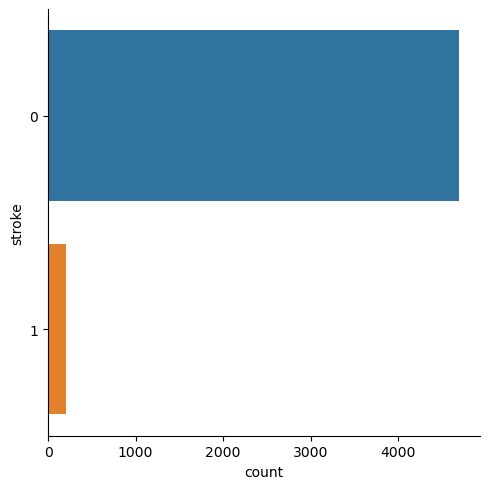

In [8]:
sb.catplot(y = 'stroke', data = data, kind = "count")

In [9]:
countN, countY = data['stroke'].value_counts()
print("The ratio of classes is Stroke : No Stroke = ",countY,":",countN)

The ratio of classes is Stroke : No Stroke =  209 : 4700


Analyse numeric variables: Age and BMI

In [10]:
data[['age','bmi','avg_glucose_level']].describe()

,age,bmi,avg_glucose_level
count,4909.000000,4909.000000,4909.000000
mean,42.865374,28.893237,105.305150
std,22.555115,7.854067,44.424341
min,0.080000,10.300000,55.120000
25%,25.000000,23.500000,77.070000
50%,44.000000,28.100000,91.680000
75%,60.000000,33.100000,113.570000
max,82.000000,97.600000,271.740000


In [11]:
data[['hypertension','heart_disease']].describe()

,hypertension,heart_disease
count,4909.000000,4909.000000
mean,0.091872,0.049501
std,0.288875,0.216934
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


In [12]:
data[['ever_married','work_type','gender','Residence_type','smoking_status']].describe()

,ever_married,work_type,gender,Residence_type,smoking_status
count,4909,4909,4909,4909,4909
unique,2,5,3,2,4
top,Yes,Private,Female,Urban,never smoked
freq,3204,2811,2897,2490,1852


<Figure size 2000x800 with 0 Axes>

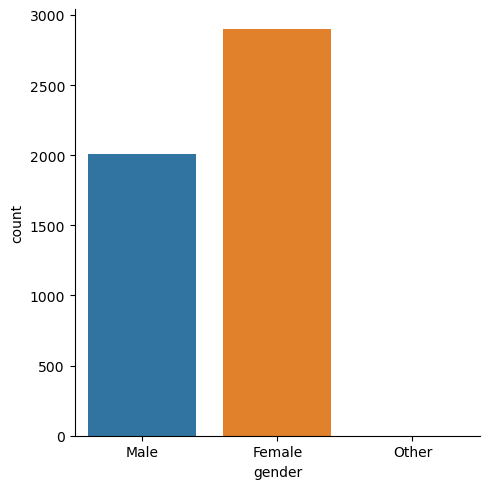

In [13]:
f = plt.figure(figsize=(20,8))
sb.catplot(x = 'gender', data=data, kind="count")
plt.show()

posx and posy should be finite values
posx and posy should be finite values


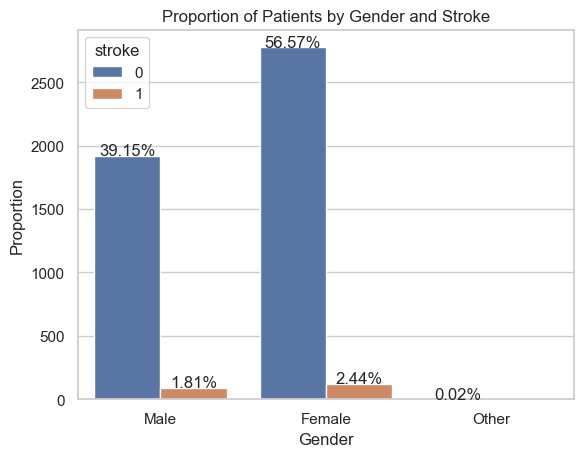

In [14]:
sb.set(style="whitegrid")
total = float(len(data))
ax = sb.countplot(x="gender", hue="stroke", data=data)
ax.set_title("Proportion of Patients by Gender and Stroke")
ax.set_xlabel("Gender")
ax.set_ylabel("Proportion")
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height+3,
            '{:.2f}%'.format(height/total*100),
            ha="center")

plt.show()

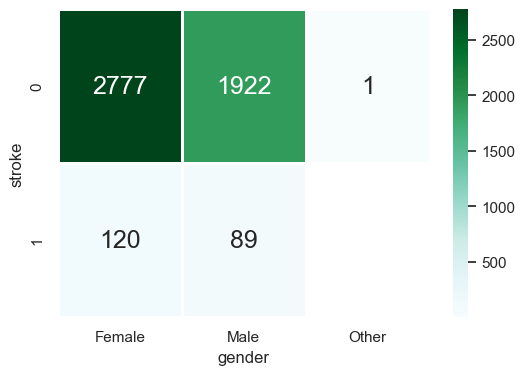

In [15]:
#Comparing gender with stroke
f = plt.figure(figsize=(6, 4))
sb.heatmap(data.groupby(['stroke', 'gender']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")
plt.show()

# Observations on gender
5% of females in the dataset had a stroke, while 5.6% of males in the dataset had a stroke. Even though there are more females, both genders have the same proportion who suffer from a stroke, which may suggest that there might not be a relationship between stroke and gender

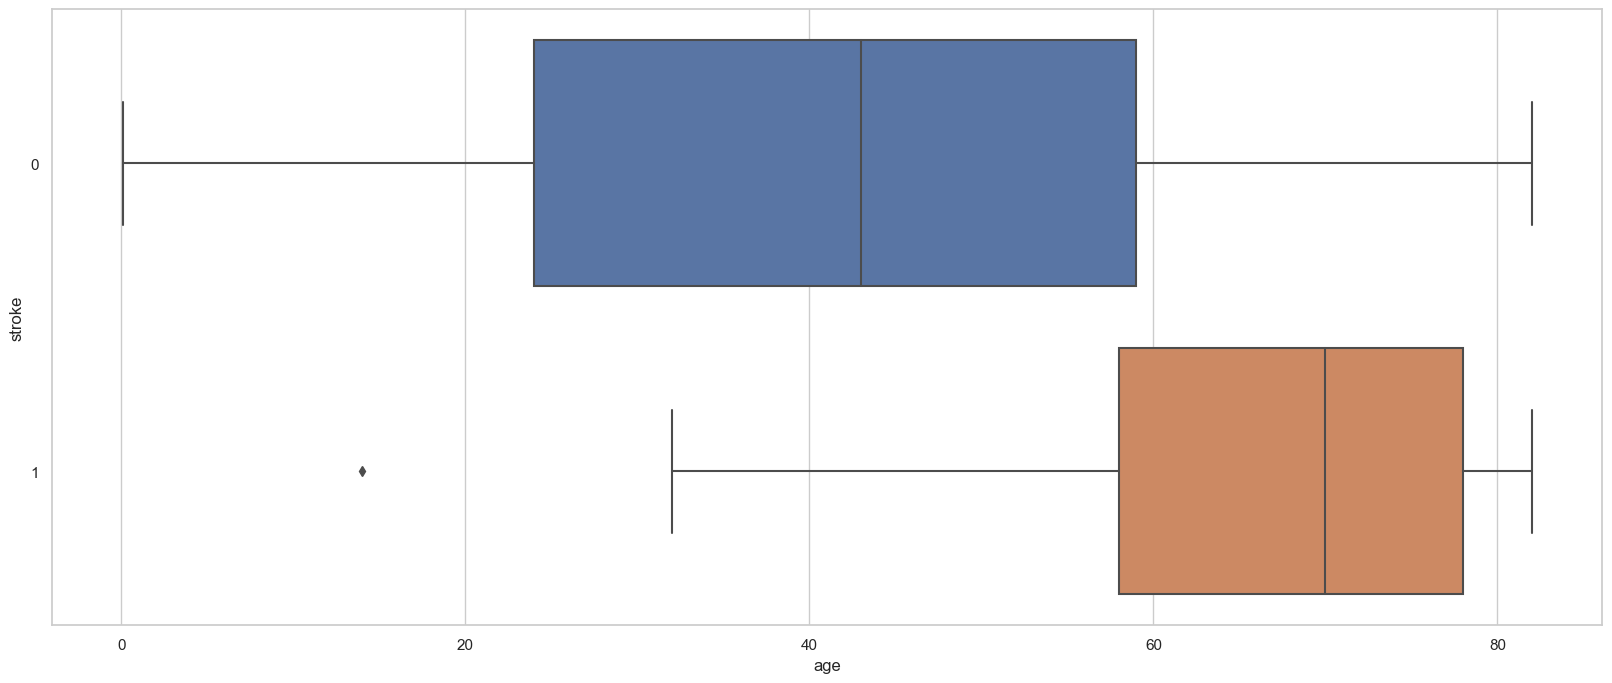

In [16]:
f = plt.figure(figsize=(20,8))
sb.boxplot(x='age',y='stroke',data=data,orient="h")
plt.show()

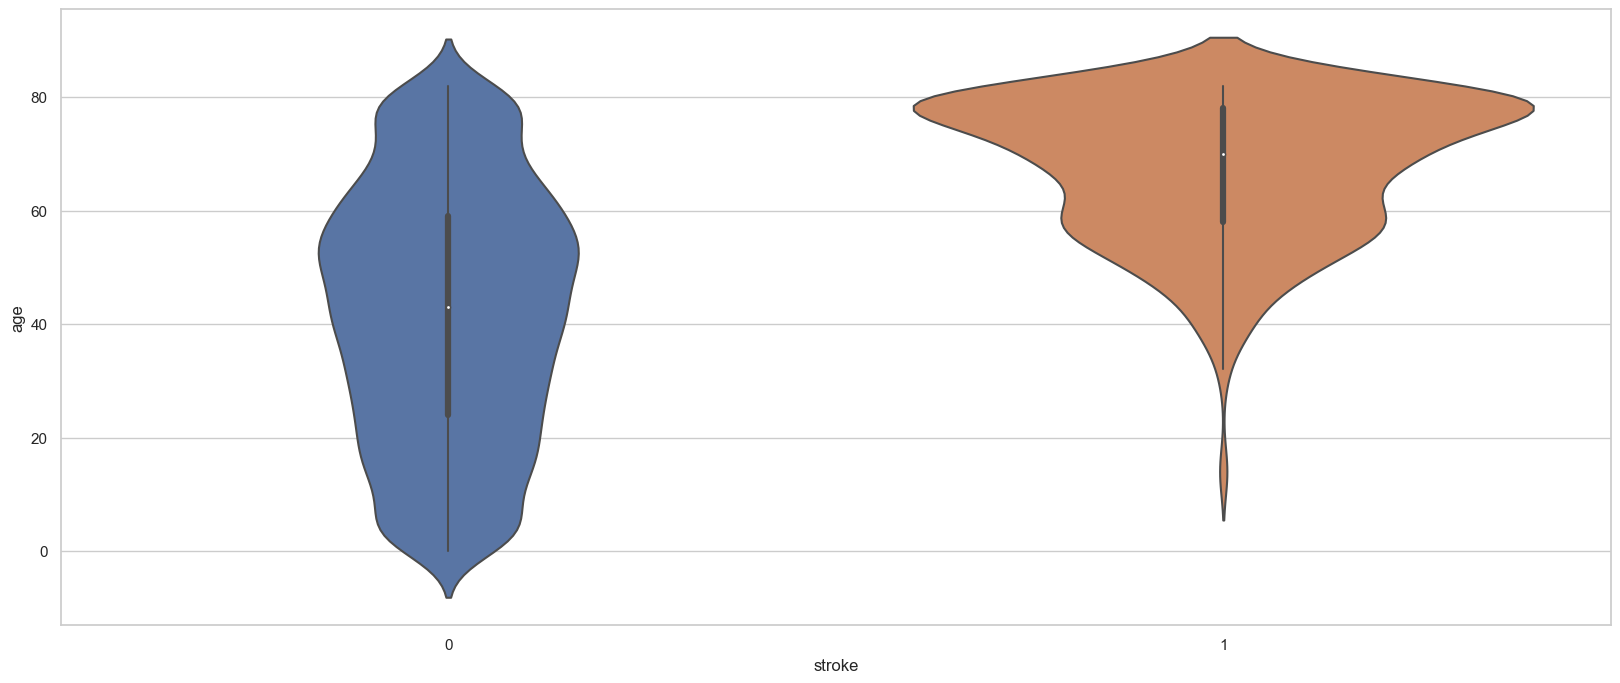

In [17]:
f = plt.figure(figsize=(20,8))
sb.violinplot(x='stroke',y='age',data=data)
plt.show()

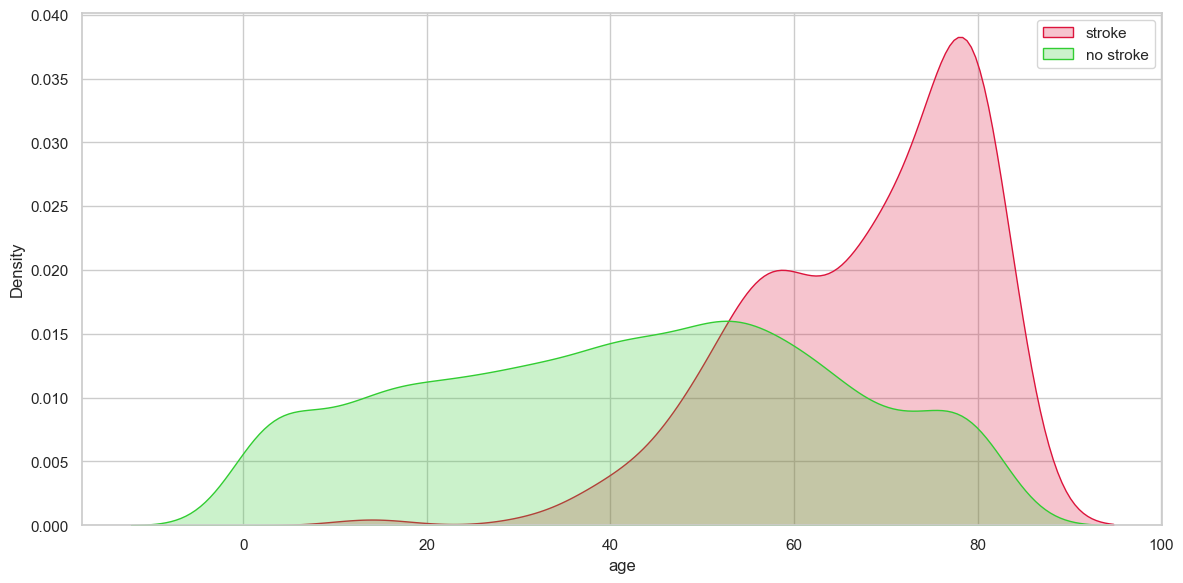

In [18]:
#Looking at proportion of age with stroke
fig, ax = plt.subplots(figsize=(12, 6))
sb.kdeplot(data=data[data.stroke==1], x='age',
            color='crimson', label='stroke', fill=True, ax=ax)
sb.kdeplot(data=data[data.stroke==0], x='age',
            color='limegreen', label='no stroke', fill=True, ax=ax)
ax.legend()
plt.tight_layout()
plt.show()

# Observations on 'Age'
Based on the violinplot for patients with stroke, the plot is skewed towards patients with higher age, suggesting that patients with stroke tend to be of higher age. Furthermore, the shapes of the 2 violin plots are vastly different, as patients without stroke are mostly spread out among different age groups, whereas patients with stroke tend to skew towards those with higher age. Finally, the minimum age for patients with stroke is above 30 years old.

<Figure size 2000x800 with 0 Axes>

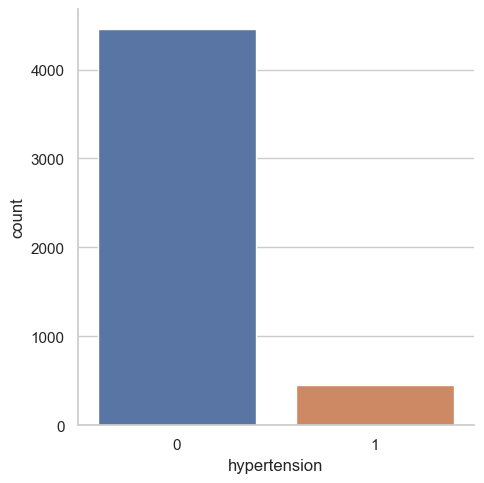

In [19]:
f = plt.figure(figsize=(20,8))
sb.catplot(x = 'hypertension', data=data, kind="count")
plt.show()

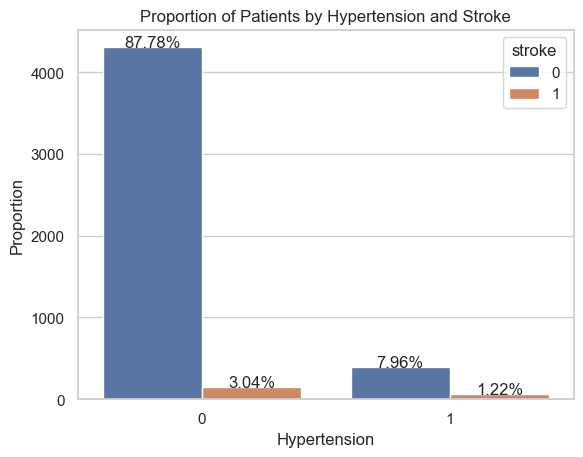

In [20]:
sb.set(style="whitegrid")
total = float(len(data))
ax = sb.countplot(x="hypertension", hue="stroke", data=data)
ax.set_title("Proportion of Patients by Hypertension and Stroke")
ax.set_xlabel("Hypertension")
ax.set_ylabel("Proportion")
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height+3,
            '{:.2f}%'.format(height/total*100),
            ha="center")

plt.show()

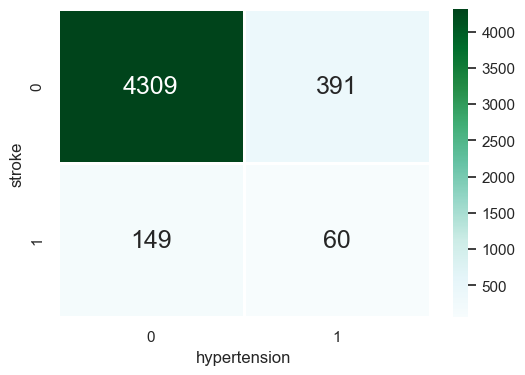

In [21]:
#Comparing hypertension with stroke
f = plt.figure(figsize=(6, 4))
sb.heatmap(data.groupby(['stroke', 'hypertension']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")
plt.show()

# Observations on hypertension
There are significantly more patients without hypertension. Among patients without hypertension, 4.1% suffer from a stroke, whereas 14% of patients with hypertension suffer from a stroke. There might be a relationship between hypertension and stroke, such that patients with hypertension are more likely to suffer from a stroke.

<Figure size 2000x800 with 0 Axes>

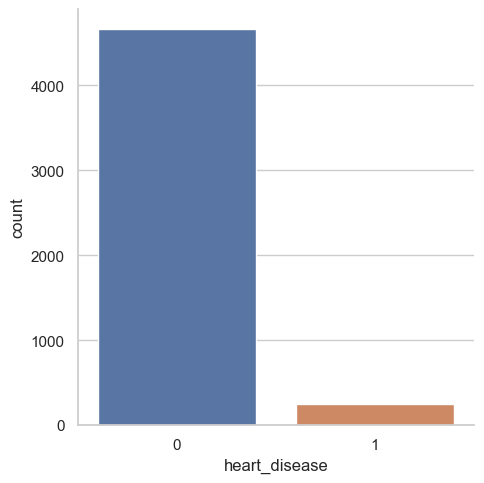

In [22]:
f = plt.figure(figsize=(20,8))
sb.catplot(x = 'heart_disease', data=data, kind="count")
plt.show()

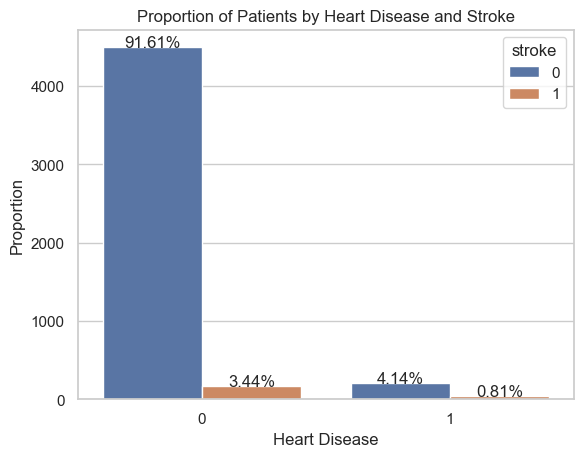

In [23]:
sb.set(style="whitegrid")
total = float(len(data))
ax = sb.countplot(x="heart_disease", hue="stroke", data=data)
ax.set_title("Proportion of Patients by Heart Disease and Stroke")
ax.set_xlabel("Heart Disease")
ax.set_ylabel("Proportion")
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height+3,
            '{:.2f}%'.format(height/total*100),
            ha="center")

plt.show()

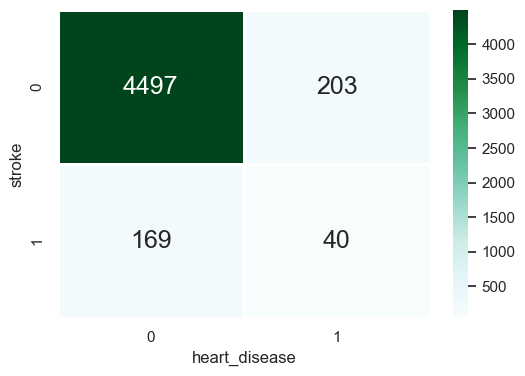

In [24]:
#Comparing heart disease with stroke
f = plt.figure(figsize=(6, 4))
sb.heatmap(data.groupby(['stroke', 'heart_disease']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")
plt.show()

# Observations on heart disease
Similar to hypertension, there is a higher proportion of patients who suffer from heart disease and has a stroke (17.5%) compared to those without heart disease and suffer from stroke (4.5%)

<Figure size 2000x800 with 0 Axes>

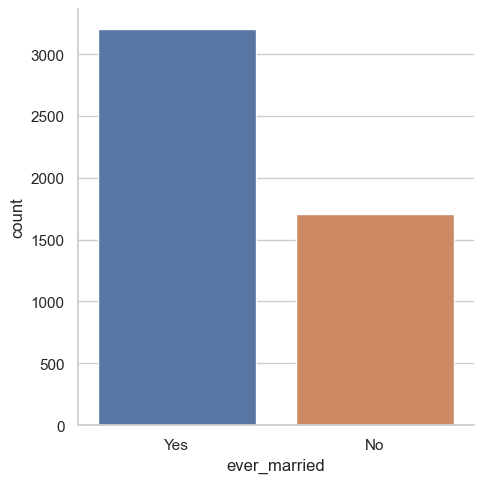

In [26]:
f = plt.figure(figsize=(20,8))
sb.catplot(x = 'ever_married', data=data, kind="count")
plt.show()

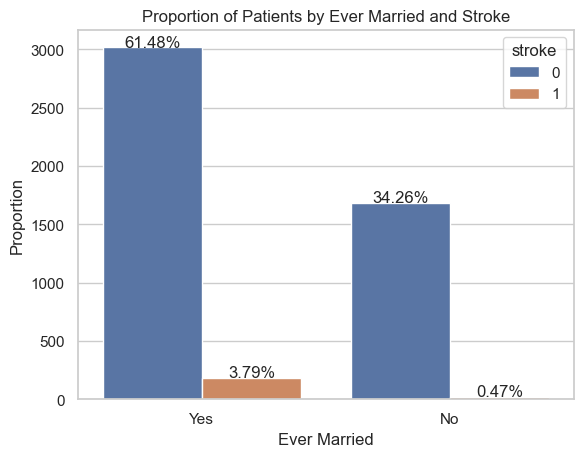

In [27]:
sb.set(style="whitegrid")
total = float(len(data))
ax = sb.countplot(x="ever_married", hue="stroke", data=data)
ax.set_title("Proportion of Patients by Ever Married and Stroke")
ax.set_xlabel("Ever Married")
ax.set_ylabel("Proportion")
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height+3,
            '{:.2f}%'.format(height/total*100),
            ha="center")

plt.show()

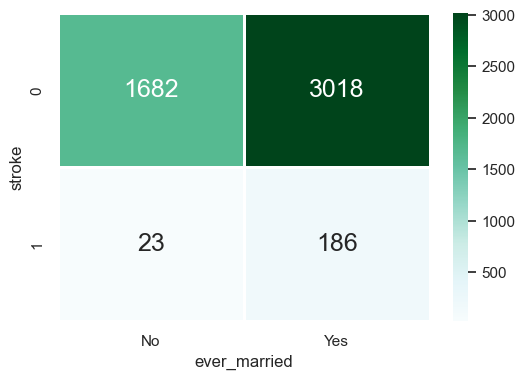

In [28]:
#Comparing ever married with stroke
f = plt.figure(figsize=(6, 4))
sb.heatmap(data.groupby(['stroke', 'ever_married']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")
plt.show()

# Observations on marriage
The proportion of patients that were ever married and suffered from a stroke (6.2%) is slightly higher than those who were never married and suffered from a stroke (2.4%)

<Figure size 2000x800 with 0 Axes>

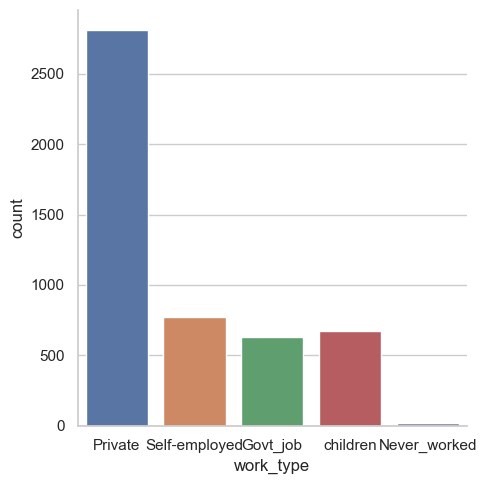

In [29]:
f = plt.figure(figsize=(20,8))
sb.catplot(x='work_type',data=data,kind="count")
plt.show()

posx and posy should be finite values
posx and posy should be finite values


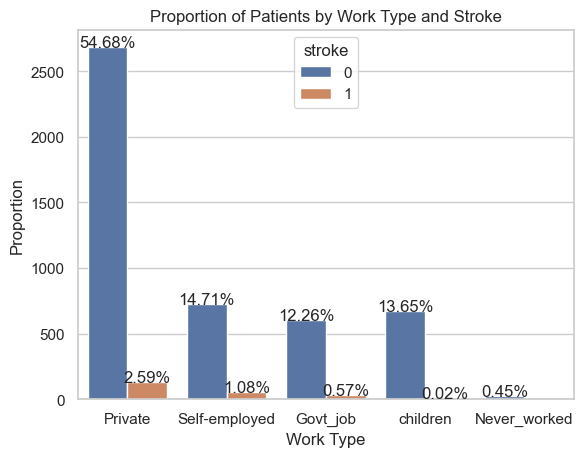

In [30]:
sb.set(style="whitegrid")
total = float(len(data))
ax = sb.countplot(x="work_type", hue="stroke", data=data)
ax.set_title("Proportion of Patients by Work Type and Stroke")
ax.set_xlabel("Work Type")
ax.set_ylabel("Proportion")
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height+3,
            '{:.2f}%'.format(height/total*100),
            ha="center")

plt.show()

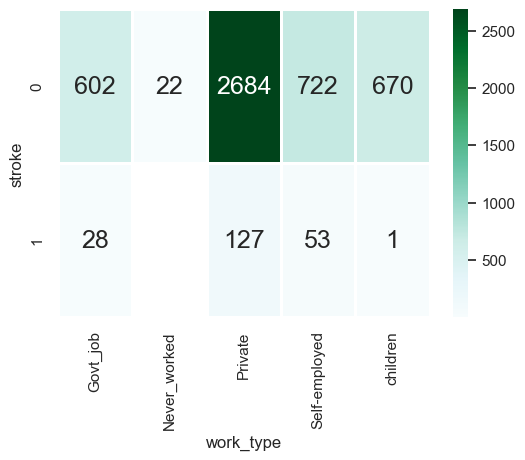

In [31]:
#Comparing work type with stroke
f = plt.figure(figsize=(6, 4))
sb.heatmap(data.groupby(['stroke', 'work_type']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")
plt.show()

# Observations on work type
The proportion of patients who have stroke and have government jobs and private workers are around 5%, while 7.6% of self employed patients suffer from a stroke. Hence, this may suggest that self-employed workers may be more likely to suffer from a stroke

<Figure size 2000x800 with 0 Axes>

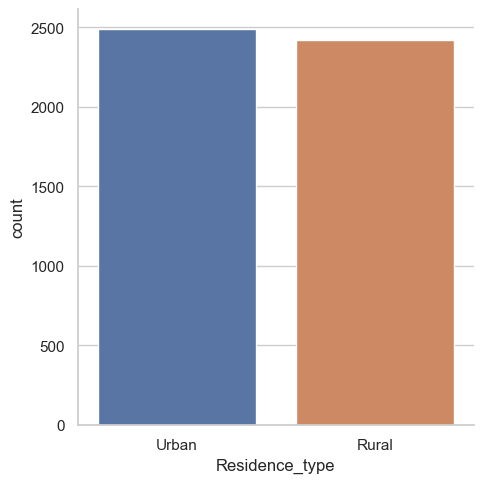

In [32]:
f = plt.figure(figsize=(20,8))
sb.catplot(x='Residence_type',data=data,kind="count")
plt.show()

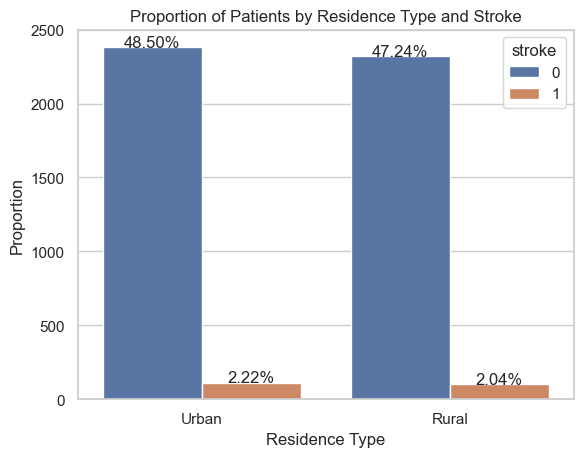

In [33]:
sb.set(style="whitegrid")
total = float(len(data))
ax = sb.countplot(x="Residence_type", hue="stroke", data=data)
ax.set_title("Proportion of Patients by Residence Type and Stroke")
ax.set_xlabel("Residence Type")
ax.set_ylabel("Proportion")
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height+3,
            '{:.2f}%'.format(height/total*100),
            ha="center")

plt.show()

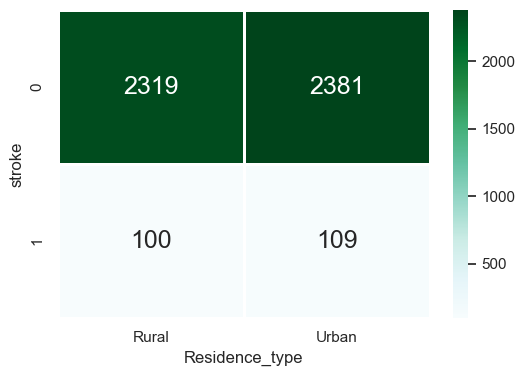

In [34]:
#Comparing residence type with stroke
f = plt.figure(figsize=(6, 4))
sb.heatmap(data.groupby(['stroke', 'Residence_type']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")
plt.show()

# Observations on residence type
There might not be a relationship between residence type as the proportion of patients who suffer from stroke regardless of their residence type is approximately 5%

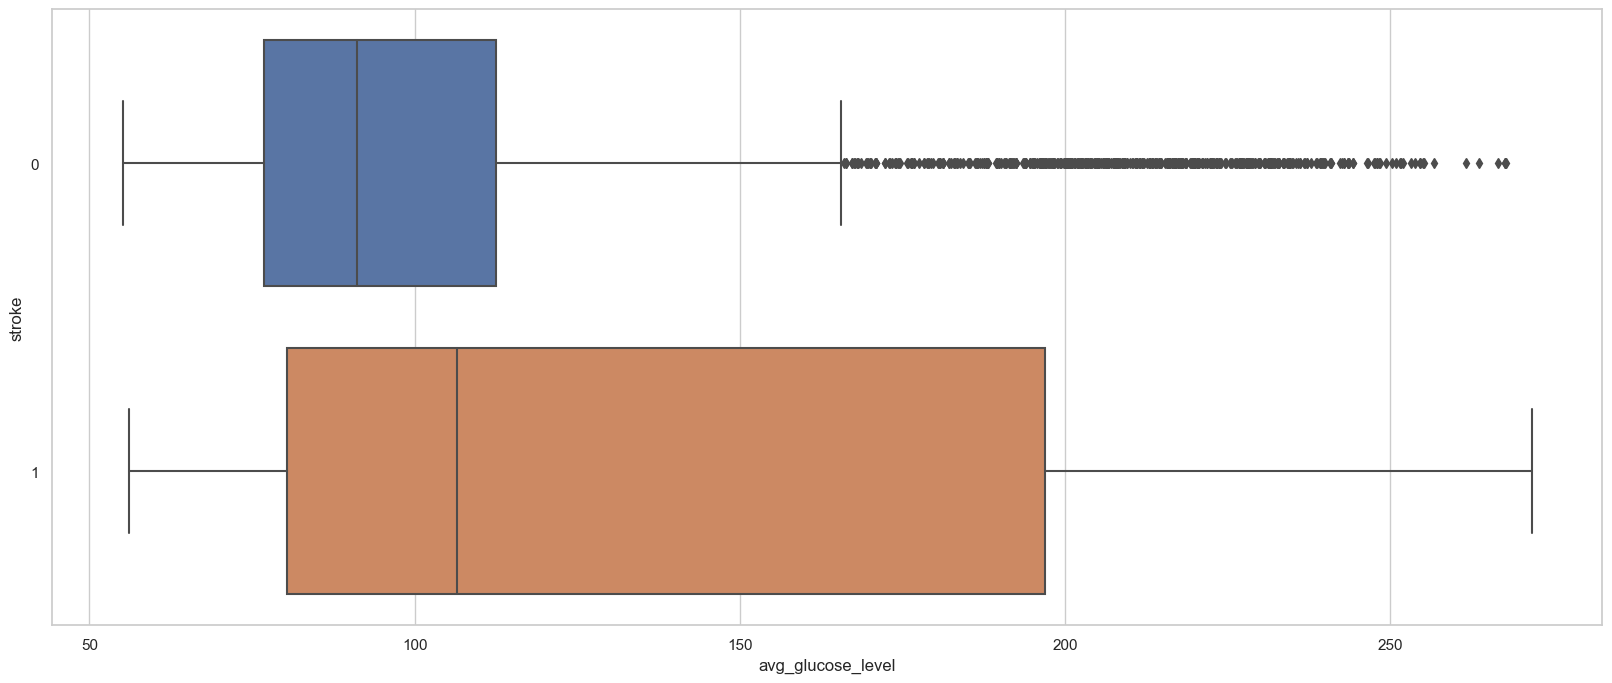

In [36]:
f = plt.figure(figsize=(20,8))
sb.boxplot(x='avg_glucose_level',y='stroke',data=data,orient="h")
plt.show()

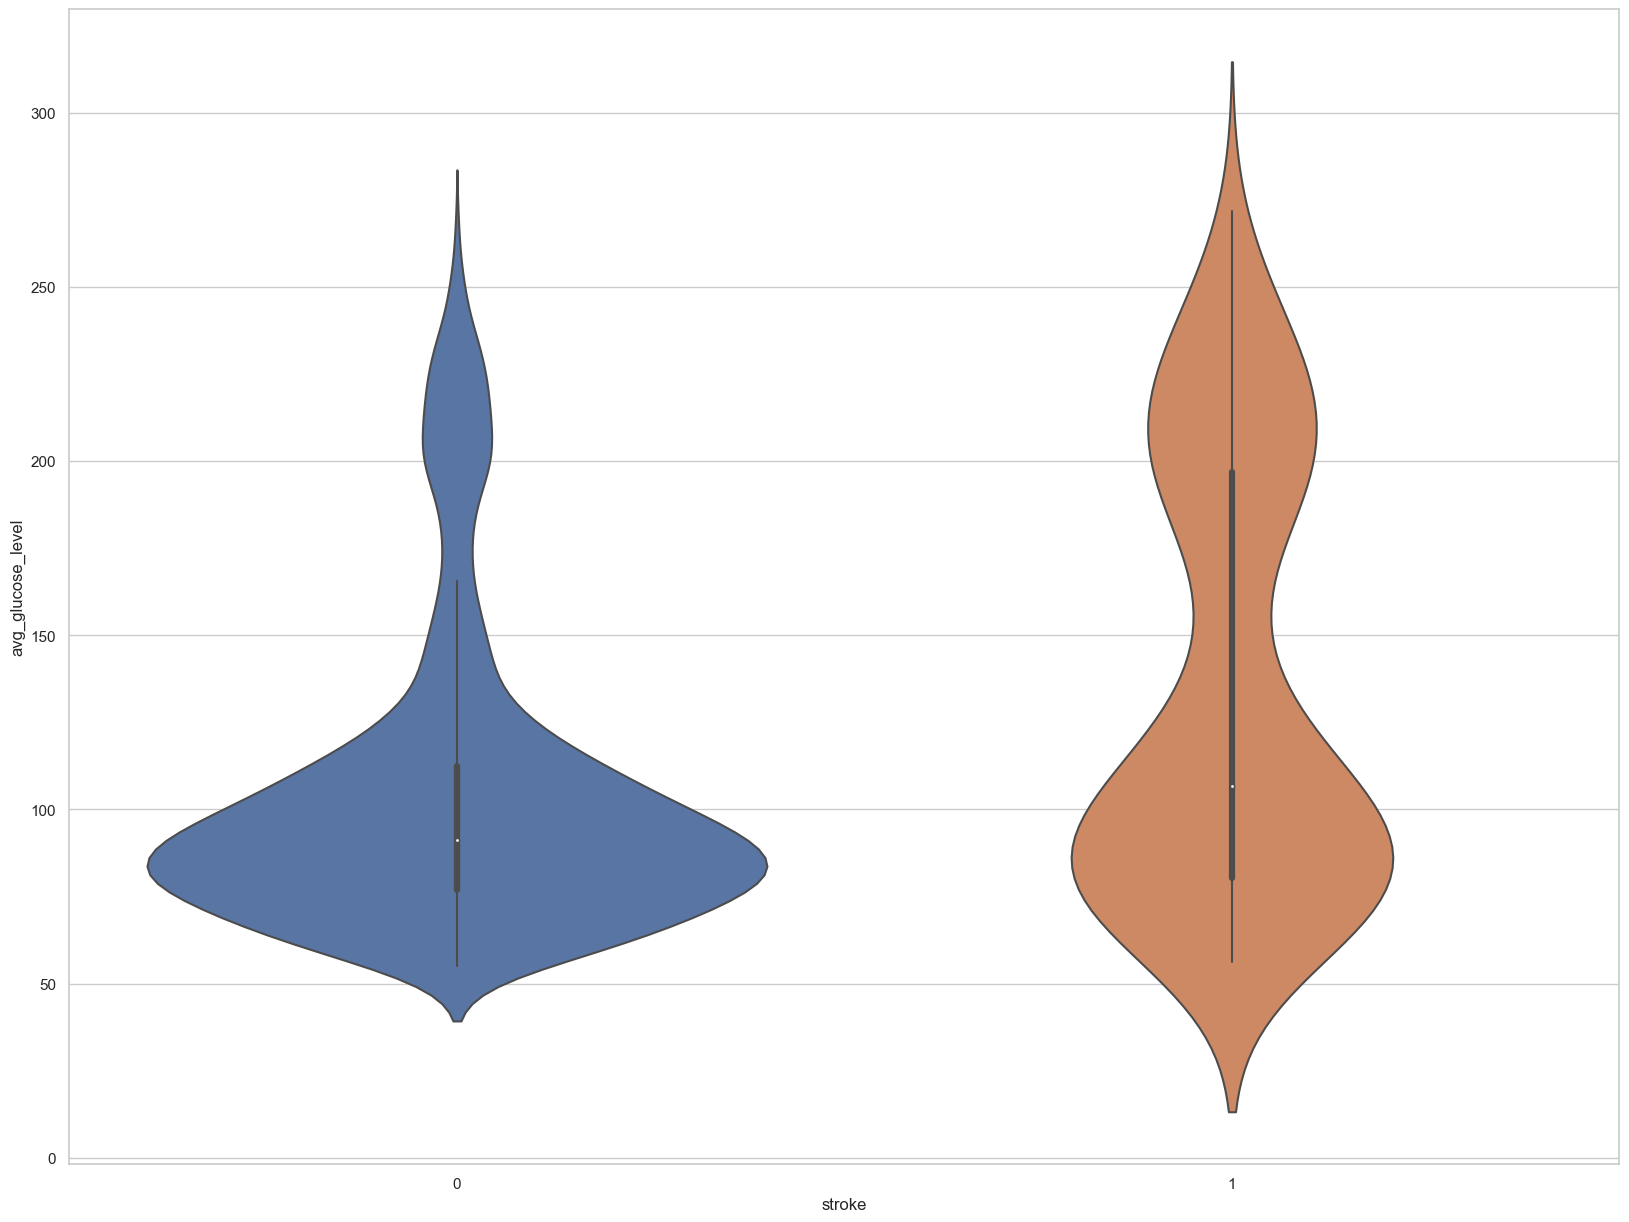

In [37]:
f = plt.figure(figsize=(20,15))
sb.violinplot(x='stroke',y='avg_glucose_level',data=data)
plt.show()

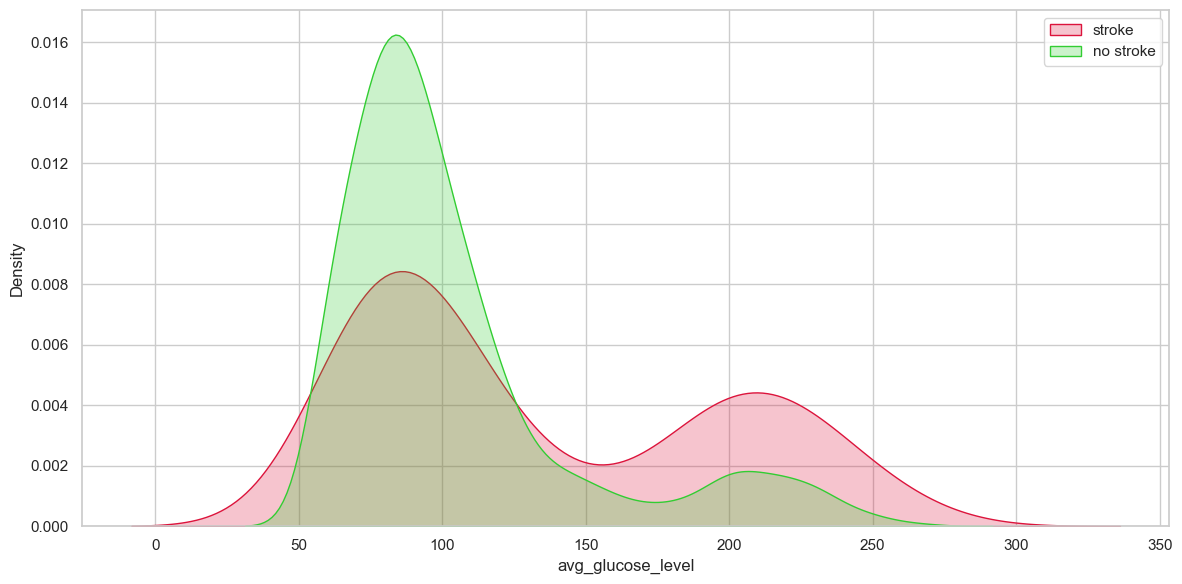

In [38]:
#Looking at proportiong of average glucose level with stroke
fig, ax = plt.subplots(figsize=(12, 6))
sb.kdeplot(data=data[data.stroke==1], x='avg_glucose_level',
            color='crimson', label='stroke', fill=True, ax=ax)
sb.kdeplot(data=data[data.stroke==0], x='avg_glucose_level',
            color='limegreen', label='no stroke', fill=True, ax=ax)
ax.legend()
plt.tight_layout()
plt.show()

# Observations on average glucose levels
Based on the boxplot for average glucose levels, there is a significant number of anomalies for patients without stroke. Additionally, the violinplot for patients without stroke shows that majorty of patients have relatively lower average glucose levels. Removing the outliers is a common method used to reduce the impact of extreme cases. However, doing so will lead to a higher density of relatively lower average glucose levels, which may be misleading in suggesting that patients who do not have a stroke have lower average glucose levels, when it might not be the case.

On the other hand, for patients with stroke, their average glucose levels seem to be more spread out, without a region of glucose levels having a more significant density

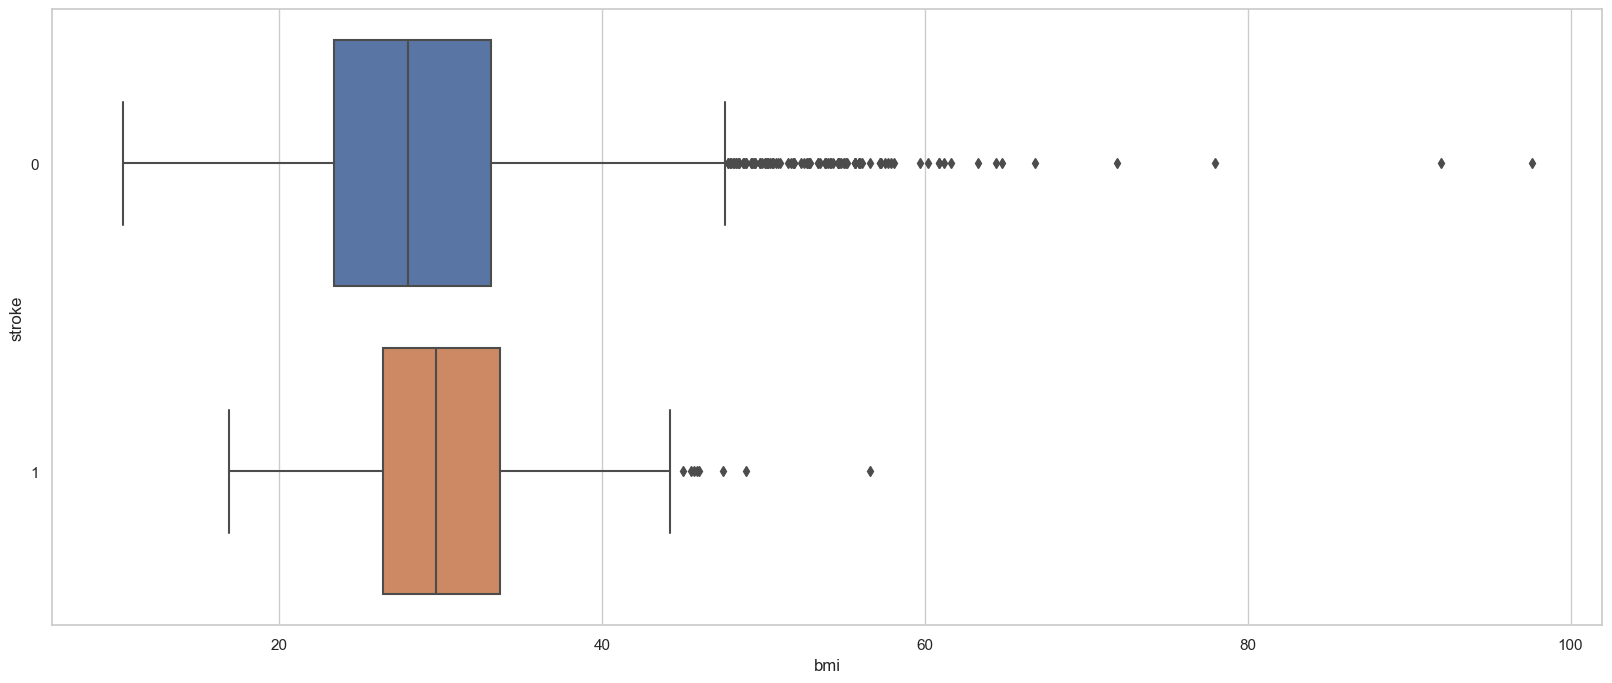

In [39]:
f = plt.figure(figsize=(20,8))
sb.boxplot(x='bmi',y='stroke',data=data,orient="h")
plt.show()

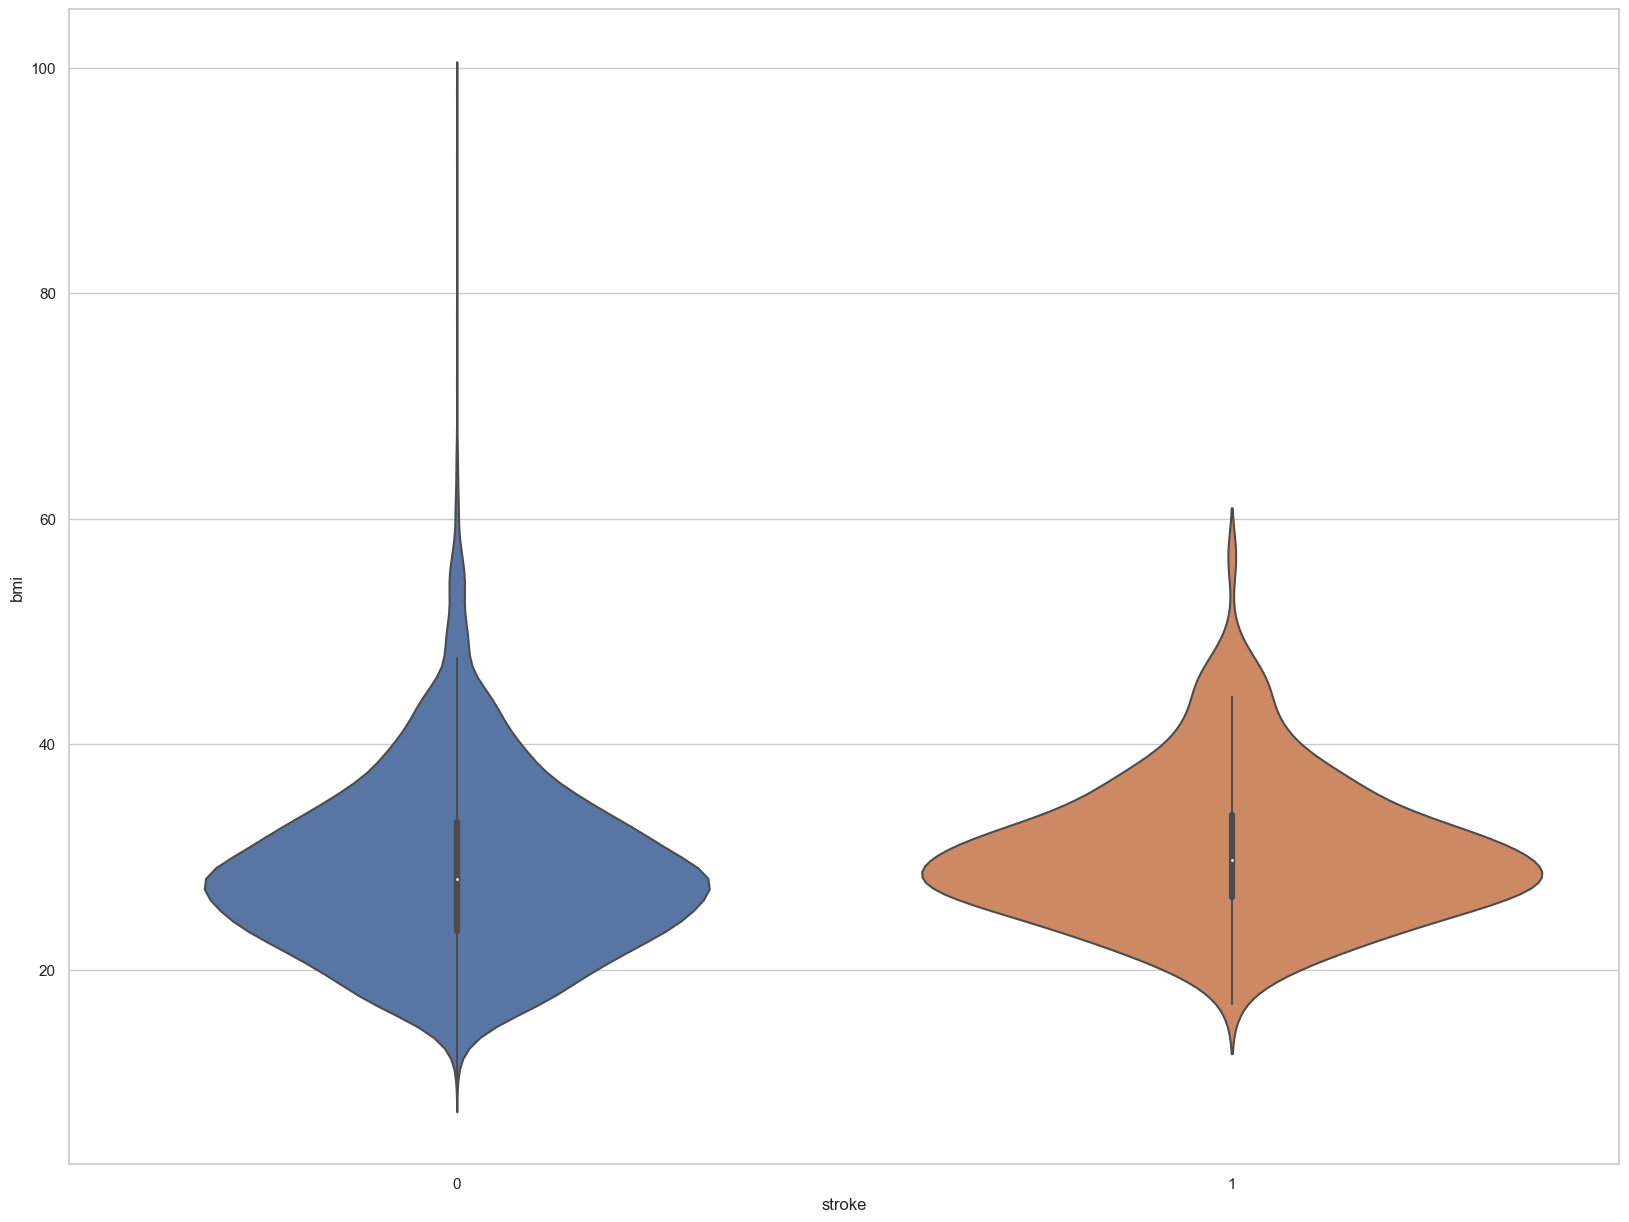

In [40]:
f = plt.figure(figsize=(20,15))
sb.violinplot(x='stroke',y='bmi',data=data)
plt.show()

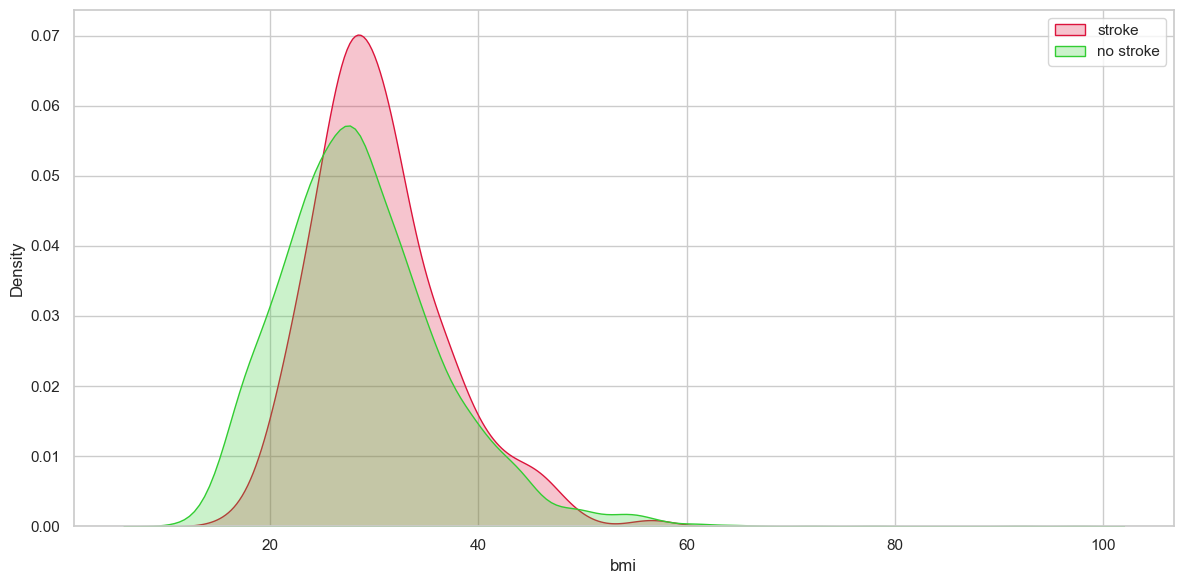

In [41]:
#Looking at proportion of bmi with stroke
fig, ax = plt.subplots(figsize=(12, 6))
sb.kdeplot(data=data[data.stroke==1], x='bmi',
            color='crimson', label='stroke', fill=True, ax=ax)
sb.kdeplot(data=data[data.stroke==0], x='bmi',
            color='limegreen', label='no stroke', fill=True, ax=ax)
ax.legend()
plt.tight_layout()
plt.show()

# Observations on BMI levels
The violinplots for both stroke and without stroke are very similar in shape, which means that the distribution of data is similar across patients with varying BMI levels, and there might not be a very significant difference between the BMI levels of patients who have stroke vs those who do not

<Figure size 2000x800 with 0 Axes>

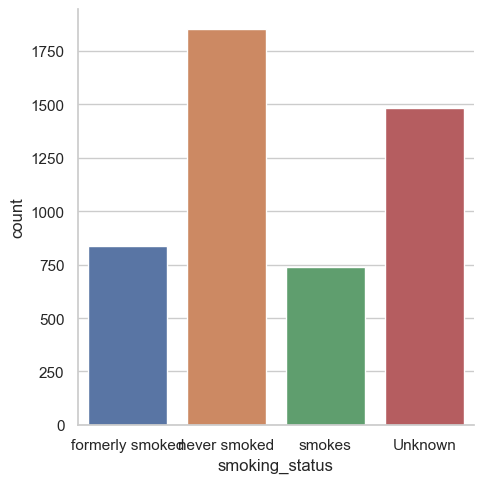

In [42]:
f = plt.figure(figsize=(20,8))
sb.catplot(x='smoking_status',data=data,kind="count")
plt.show()

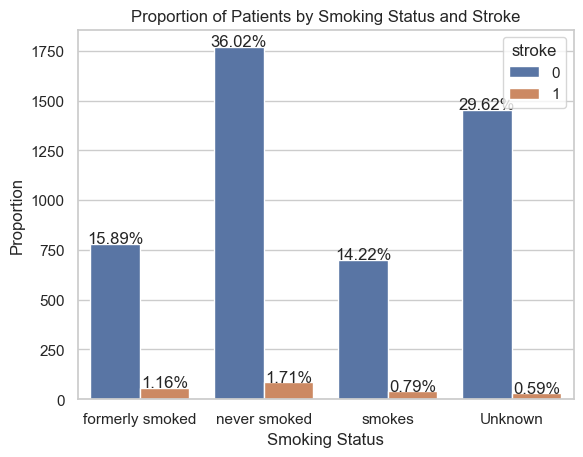

In [43]:
sb.set(style="whitegrid")
total = float(len(data))
ax = sb.countplot(x="smoking_status", hue="stroke", data=data)
ax.set_title("Proportion of Patients by Smoking Status and Stroke")
ax.set_xlabel("Smoking Status")
ax.set_ylabel("Proportion")
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height+3,
            '{:.2f}%'.format(height/total*100),
            ha="center")

plt.show()

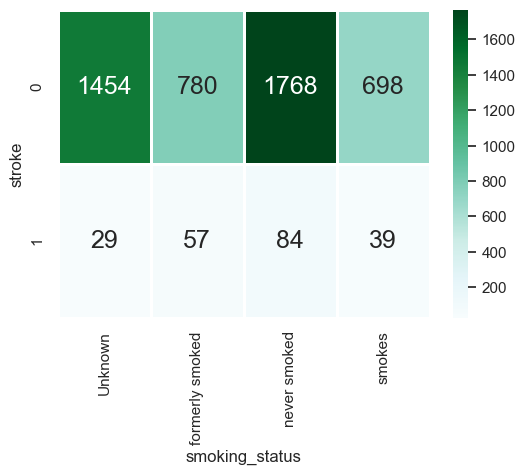

In [44]:
#Comparing smoking status with stroke
f = plt.figure(figsize=(6, 4))
sb.heatmap(data.groupby(['stroke', 'smoking_status']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")
plt.show()

# Observations on smoking status
There is a higher proportion of patients who smoke (both current and former) and suffer from a stroke compared to those who do not smoke.

# Relationship between variables

In [45]:
df = pd.DataFrame(data)

# group by the categorical variable and obtain summary statistics
grouped_data = df.groupby('heart_disease')
summary_statistics = grouped_data['age'].describe()

print(summary_statistics)

                count       mean        std   min   25%   50%   75%   max
heart_disease                                                            
0              4666.0  41.542032  22.197724  0.08  24.0  43.0  59.0  82.0
1               243.0  68.275720  11.706205  2.00  61.0  71.0  78.0  82.0


Overall, patients with heart disease tends to be older in age

In [46]:
df = pd.DataFrame(data)

# group by the categorical variable and obtain summary statistics
grouped_data = df.groupby('hypertension')
summary_statistics = grouped_data['age'].describe()

print(summary_statistics)

               count       mean        std    min   25%   50%   75%   max
hypertension                                                             
0             4458.0  40.896842  22.328878   0.08  23.0  42.0  58.0  82.0
1              451.0  62.323725  13.877298  17.00  53.0  63.0  74.0  82.0


Overall, patients with hypertension tends to be older in age.

In [47]:
df = pd.DataFrame(data)

# group by the categorical variable and obtain summary statistics
grouped_data = df.groupby('smoking_status')
summary_statistics = grouped_data['Residence_type'].describe()

print(summary_statistics)

                count unique    top freq
smoking_status                          
Unknown          1483      2  Urban  745
formerly smoked   837      2  Urban  430
never smoked     1852      2  Rural  938
smokes            737      2  Urban  401


Overall, patients who smoke (former and current) tend to be from urban areas compared to those who do not smoke

In [48]:
df = pd.DataFrame(data)

# group by the categorical variable and obtain summary statistics
grouped_data = df.groupby('ever_married')
summary_statistics = grouped_data['bmi'].describe()

print(summary_statistics)

               count       mean       std   min   25%   50%   75%   max
ever_married                                                           
No            1705.0  25.214721  7.783018  10.3  19.5  23.5  29.0  97.6
Yes           3204.0  30.850749  7.159654  11.3  26.1  29.6  34.4  92.0


Overall, patients who were ever married have a slightly higher BMI than those who were never married

In [49]:
df = pd.DataFrame(data)

# group by the categorical variable and obtain summary statistics
grouped_data = df.groupby('work_type')
summary_statistics = grouped_data['age'].describe()

print(summary_statistics)

                count       mean        std    min    25%   50%   75%   max
work_type                                                                  
Govt_job        630.0  50.717460  15.300057  14.00  40.00  51.0  62.0  82.0
Never_worked     22.0  16.181818   2.342899  13.00  14.25  16.0  17.0  23.0
Private        2811.0  45.203842  18.364985   8.00  30.00  45.0  59.0  82.0
Self-employed   775.0  59.916129  17.003554   7.00  48.00  62.0  75.0  82.0
children        671.0   6.877973   4.536291   0.08   2.00   7.0  11.0  16.0


Overall, self-employed individuals tend to be older compared to other categories of work type